In [1]:
%tensorflow_version 2.x
import tensorflow as tf
print(tf.__version__)

print('GPU name: {}'.format(tf.test.gpu_device_name()))

Colab only includes TensorFlow 2.x; %tensorflow_version has no effect.
2.12.0
GPU name: /device:GPU:0


In [75]:
from tensorflow.keras.layers import Embedding, Input, Bidirectional, LSTM, GRU, Dense


# Sequence modelling 

## Coding tutorials
 #### 1.  The IMDb dataset
 #### 2. Padding and masking sequence data
 #### 3. The `Embedding` layer
 #### 4. The Embedding Projector
 #### 5. Recurrent neural network layers
 #### 6. Stacked RNNs and the `Bidirectional` wrapper

***
<a id="coding_tutorial_1"></a>
## The IMDb Dataset

#### Load the IMDB review sentiment dataset

In [2]:
# Import imdb

import tensorflow.keras.datasets.imdb as imdb

In [7]:
# Download and assign the data set using load_data()

(x_train, y_train), (x_test, y_test) = imdb.load_data()

#### Inspect the dataset

In [4]:
# Inspect the type of the data

type(x_train)

numpy.ndarray

In [5]:
# Inspect the shape of the data

x_train.shape

(25000,)

In [ ]:
# Display the first dataset element input
# Notice encoding

x_train[0]

In [8]:
# Display the first dataset element output

y_train[0]

1

#### Load dataset with different options

In [9]:
# Load the dataset with defaults

imdb.load_data(path='imdb.pmz', 
               index_from=3)

# ~/.keras/dataset/

17464789/17464789 [==============================] - 0s 0us/step


((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [10]:
# Limit the vocabulary to the top 500 words using num_words

imdb.load_data(num_words=500)

((array([list([1, 14, 22, 16, 43, 2, 2, 2, 2, 65, 458, 2, 66, 2, 4, 173, 36, 256, 5, 25, 100, 43, 2, 112, 50, 2, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 2, 2, 17, 2, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2, 19, 14, 22, 4, 2, 2, 469, 4, 22, 71, 87, 12, 16, 43, 2, 38, 76, 15, 13, 2, 4, 22, 17, 2, 17, 12, 16, 2, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2, 2, 16, 480, 66, 2, 33, 4, 130, 12, 16, 38, 2, 5, 25, 124, 51, 36, 135, 48, 25, 2, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 2, 15, 256, 4, 2, 7, 2, 5, 2, 36, 71, 43, 2, 476, 26, 400, 317, 46, 7, 4, 2, 2, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2, 56, 26, 141, 6, 194, 2, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 2, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 2, 88, 12, 16, 283, 5, 16, 2, 113, 103, 32, 15, 16, 2, 19, 178, 32]),
         list([1, 194, 2, 194, 2, 78, 228, 5, 6, 2, 2, 2, 134, 26, 4, 2, 8, 118, 2, 14, 394, 20, 13, 119, 2, 189, 102, 5, 207, 110, 2, 

In [11]:
# Ignore the top 10 most frequent words using skip_top

imdb.load_data(skip_top=10)

((array([list([2, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 2, 173, 36, 256, 2, 25, 100, 43, 838, 112, 50, 670, 22665, 2, 35, 480, 284, 2, 150, 2, 172, 112, 167, 21631, 336, 385, 39, 2, 172, 4536, 1111, 17, 546, 38, 13, 447, 2, 192, 50, 16, 2, 147, 2025, 19, 14, 22, 2, 1920, 4613, 469, 2, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 2, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 2, 62, 386, 12, 2, 316, 2, 106, 2, 2, 2223, 5244, 16, 480, 66, 3785, 33, 2, 130, 12, 16, 38, 619, 2, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 2, 22, 12, 215, 28, 77, 52, 2, 14, 407, 16, 82, 10311, 2, 2, 107, 117, 5952, 15, 256, 2, 31050, 2, 3766, 2, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 2, 2, 12118, 1029, 13, 104, 88, 2, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 2, 194, 7486, 18, 2, 226, 22, 21, 134, 476, 26, 480, 2, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 2, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 2, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([2, 19

In [13]:
# Limit the sequence lengths to 500 using maxlen

imdb.load_data(maxlen=500)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

In [14]:
 # Use '1' as the character that indicates the start of a sequence

 imdb.load_data(start_char=1)

((array([list([1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]),
         list([1, 19

#### Explore the dataset word index

In [15]:
# Load the imdb word index using get_word_index()

imdb_word_idx = imdb.get_word_index()

1641221/1641221 [==============================] - 0s 0us/step


In [16]:
# View the word index as a dictionary,
# accounting for index_from.

idx_from = 3
imdb_word_idx = {key:value+idx_from for key, value in imdb_word_idx.items()}

In [20]:
# Retrieve a specific word's index

print(imdb_word_idx['simpsonian'])
print(imdb_word_idx['the'])

52256
4


In [21]:
# View an input sentence

inv_imdb_word_idx = {value:key for key, value in imdb_word_idx.items()}
[inv_imdb_word_idx[idx] for idx in x_train[0] if idx > idx_from]

['this',
 'film',
 'was',
 'just',
 'brilliant',
 'casting',
 'location',
 'scenery',
 'story',
 'direction',
 "everyone's",
 'really',
 'suited',
 'the',
 'part',
 'they',
 'played',
 'and',
 'you',
 'could',
 'just',
 'imagine',
 'being',
 'there',
 'robert',
 "redford's",
 'is',
 'an',
 'amazing',
 'actor',
 'and',
 'now',
 'the',
 'same',
 'being',
 'director',
 "norman's",
 'father',
 'came',
 'from',
 'the',
 'same',
 'scottish',
 'island',
 'as',
 'myself',
 'so',
 'i',
 'loved',
 'the',
 'fact',
 'there',
 'was',
 'a',
 'real',
 'connection',
 'with',
 'this',
 'film',
 'the',
 'witty',
 'remarks',
 'throughout',
 'the',
 'film',
 'were',
 'great',
 'it',
 'was',
 'just',
 'brilliant',
 'so',
 'much',
 'that',
 'i',
 'bought',
 'the',
 'film',
 'as',
 'soon',
 'as',
 'it',
 'was',
 'released',
 'for',
 'retail',
 'and',
 'would',
 'recommend',
 'it',
 'to',
 'everyone',
 'to',
 'watch',
 'and',
 'the',
 'fly',
 'fishing',
 'was',
 'amazing',
 'really',
 'cried',
 'at',
 'the',


In [22]:
# Get the sentiment value

y_train[0]

1

---
<a id="coding_tutorial_2"></a>
## Padding and Masking Sequence Data

In [3]:
# Load the imdb data set

import tensorflow.keras.datasets.imdb as imdb
(x_train, y_train), (x_test, y_test) = imdb.load_data()

17464789/17464789 [==============================] - 2s 0us/step


#### Preprocess the data with padding

In [4]:
# Inspect the input data shape

x_train.shape

(25000,)

In [6]:
# Pad the inputs to the maximum length using maxlen

pad_x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train, maxlen=300, padding="post", truncating="pre")

In [7]:
# Inspect the output data shape

pad_x_train.shape

(25000, 300)

#### Create a Masking layer

In [8]:
# Import numpy 

import numpy as np

In [9]:
# Masking expects to see (batch, sequence, features)
# Create a dummy feature dimension using expand_dims

pad_x_train = np.expand_dims(pad_x_train, -1)

In [10]:
# Create a Masking layer 

tf_x_train = tf.convert_to_tensor(pad_x_train, dtype='float32')
mask_layer = tf.keras.layers.Masking(mask_value=0.0)

In [11]:
# Pass tf_x_train to it

mask_x_train = mask_layer(tf_x_train)

In [13]:
# Look at the dataset

tf_x_train, mask_x_train

(<tf.Tensor: shape=(25000, 300, 1), dtype=float32, numpy=
 array([[[1.000e+00],
         [1.400e+01],
         [2.200e+01],
         ...,
         [0.000e+00],
         [0.000e+00],
         [0.000e+00]],
 
        [[1.000e+00],
         [1.940e+02],
         [1.153e+03],
         ...,
         [0.000e+00],
         [0.000e+00],
         [0.000e+00]],
 
        [[1.000e+00],
         [1.400e+01],
         [4.700e+01],
         ...,
         [0.000e+00],
         [0.000e+00],
         [0.000e+00]],
 
        ...,
 
        [[1.000e+00],
         [1.100e+01],
         [6.000e+00],
         ...,
         [0.000e+00],
         [0.000e+00],
         [0.000e+00]],
 
        [[1.000e+00],
         [1.446e+03],
         [7.079e+03],
         ...,
         [0.000e+00],
         [0.000e+00],
         [0.000e+00]],
 
        [[1.000e+00],
         [1.700e+01],
         [6.000e+00],
         ...,
         [0.000e+00],
         [0.000e+00],
         [0.000e+00]]], dtype=float32)>,
 <tf.Tensor: shap

In [14]:
# Look at the ._keras_mask for the dataset

mask_x_train._keras_mask

<tf.Tensor: shape=(25000, 300), dtype=bool, numpy=
array([[ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       ...,
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False],
       [ True,  True,  True, ..., False, False, False]])>

***
<a id="coding_tutorial_3"></a>
## The Embedding layer

#### Create and apply an `Embedding` layer

In [3]:
# Create an embedding layer using layers.Embedding
# Specify input_dim, output_dim, input_length

emb_layer = tf.keras.layers.Embedding(input_dim=501, 
                                     output_dim=16)

In [4]:
# Inspect an Embedding layer output for a fixed input
# Expects an input of shape (batch, sequence, feature)

seq_idx = tf.constant([[[0], [1], [5], [500]]])
seq_emb = emb_layer(seq_idx)
seq_emb

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.04497596, -0.03504031,  0.01412835, -0.03696153,
           0.0008332 ,  0.02323642,  0.0198633 ,  0.04850857,
          -0.00824603,  0.00929097,  0.04650616, -0.0393547 ,
          -0.00369384,  0.02877848, -0.04470298, -0.01061958]],

        [[ 0.0494579 , -0.04320111,  0.02695235,  0.00993466,
           0.02865067,  0.03898465,  0.04038601,  0.00781624,
          -0.01820887,  0.0090215 , -0.03790595,  0.02425316,
           0.01572448,  0.02223006,  0.00620268, -0.01315839]],

        [[ 0.00608257,  0.02817753,  0.03354636,  0.04811139,
          -0.01717107,  0.03107611,  0.02719276,  0.04763284,
          -0.04053152,  0.0141635 ,  0.00969227,  0.04825295,
          -0.04966727, -0.03244244,  0.00689413,  0.02914175]],

        [[ 0.02904933, -0.02416413, -0.02264961,  0.01985245,
          -0.04789795,  0.02416161,  0.03337189,  0.00474216,
           0.03333661,  0.03977425,  0.03821013, -0.00532674,
      

In [5]:
# Inspect the Embedding layer weights using get_weights()

emb_layer.get_weights()[0]

array([[-0.04497596, -0.03504031,  0.01412835, ...,  0.02877848,
        -0.04470298, -0.01061958],
       [ 0.0494579 , -0.04320111,  0.02695235, ...,  0.02223006,
         0.00620268, -0.01315839],
       [ 0.00068902,  0.00123895, -0.00988625, ...,  0.0272564 ,
        -0.04925548,  0.01125423],
       ...,
       [-0.03282274, -0.04355152,  0.0466421 , ..., -0.01685469,
        -0.03766977, -0.03263276],
       [-0.00669229,  0.02021256,  0.02818425, ..., -0.00248768,
         0.01205941, -0.0230231 ],
       [ 0.02904933, -0.02416413, -0.02264961, ...,  0.01409863,
        -0.00592898, -0.00222229]], dtype=float32)

In [7]:
# Get the embedding for the 14th index

emb_layer.get_weights()[0][14]

array([-0.02715294, -0.04545245, -0.00445638, -0.04253547, -0.02404606,
       -0.00058881, -0.01291303, -0.04087365,  0.02323085,  0.04241971,
       -0.02007343, -0.00352374, -0.00329006,  0.00888838,  0.04815582,
       -0.0180936 ], dtype=float32)

#### Create and apply an `Embedding` layer that uses `mask_zero=True`

In [8]:
# Create a layer that uses the mask_zero kwarg

mask_emb_layer = tf.keras.layers.Embedding(input_dim=501, output_dim=16, mask_zero=True)

In [10]:
# Apply this layer to the sequence and see the _keras_mask property

mask_seq_emb = mask_emb_layer(seq_idx)
mask_seq_emb

<tf.Tensor: shape=(1, 4, 1, 16), dtype=float32, numpy=
array([[[[-0.04234118,  0.01368718, -0.03565646,  0.02509305,
          -0.02364564,  0.03144456,  0.01441662,  0.0222627 ,
          -0.01939349, -0.04704876, -0.03453721,  0.00883408,
           0.00147339, -0.04296626, -0.00677548, -0.04823476]],

        [[ 0.04343251,  0.02570336,  0.00712061, -0.03706891,
          -0.03579006, -0.0468191 , -0.02690709, -0.02440559,
          -0.0220887 ,  0.03015627, -0.03260278,  0.0384575 ,
          -0.03190601, -0.0083554 ,  0.03197331, -0.00359335]],

        [[-0.03257613, -0.0371321 ,  0.04064903, -0.01246872,
           0.02814939, -0.04514964,  0.02637751, -0.00105916,
          -0.04822635,  0.01721421,  0.04112864,  0.01989101,
          -0.00244342,  0.00723022, -0.0078731 , -0.00223235]],

        [[-0.03507277, -0.0195811 , -0.04213725, -0.03757174,
          -0.02868798, -0.01730596, -0.00711286, -0.00465262,
           0.0194503 , -0.01550397, -0.01035973,  0.04323781,
      

---
<a id="coding_tutorial_4"></a>
## The Embedding Projector

#### Mount Google Drive

In [11]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


#### Load and preprocess the IMDb data

In [12]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [13]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset()

17464789/17464789 [==============================] - 2s 0us/step


In [14]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [15]:
# Get the word index

imdb_word_idx = get_imdb_word_index()

1641221/1641221 [==============================] - 1s 1us/step


In [16]:
# Swap the keys and values of the word index

inv_imdb_word_idx = {value: key for key, value in imdb_word_idx.items()}

In [ ]:
# View the first dataset example sentence

[inv_imdb_word_idx[idx] for idx in x_train[100] if idx>2]

#### Build an Embedding layer into a model

In [18]:
# Get the maximum token value

max_idx = max(imdb_word_idx.values())

In [21]:
# Specify an embedding dimension

emb_dim = 16

In [22]:
# Build a model using Sequential:
#     1. Embedding layer
#     2. GlobalAveragePooling1D
#     3. Dense

model = tf.keras.Sequential([
    tf.keras.layers.Embedding(max_idx+1, emb_dim, mask_zero=False),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [24]:
# Functional API refresher: use the Model to build the same model

review_seq = tf.keras.Input((None,))
emb_seq = tf.keras.layers.Embedding(max_idx+1, emb_dim, mask_zero=True)(review_seq)
avg_emb = tf.keras.layers.GlobalAveragePooling1D()(emb_seq)
output = tf.keras.layers.Dense(1, activation='sigmoid')(avg_emb)

model = tf.keras.Model(inputs=review_seq, outputs=output)

In [25]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, None)]            0         
                                                                 
 embedding_3 (Embedding)     (None, None, 16)          160016    
                                                                 
 global_average_pooling1d_1   (None, 16)               0         
 (GlobalAveragePooling1D)                                        
                                                                 
 dense_1 (Dense)             (None, 1)                 17        
                                                                 
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


#### Compile, train, and evaluate the model

In [27]:
# Compile the model with a binary cross-entropy loss

model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer='adam')

In [28]:
# Train the model using .fit(), savng its history

history = model.fit(x_train, y_train,
                    epochs=5, batch_size=32,
                    validation_data=(x_test,y_test),
                    validation_steps=20)

Epoch 1/5
782/782 [==============================] - 113s 137ms/step - loss: 0.6119 - accuracy: 0.7582 - val_loss: 0.4983 - val_accuracy: 0.8078
Epoch 2/5
782/782 [==============================] - 37s 47ms/step - loss: 0.4182 - accuracy: 0.8592 - val_loss: 0.3714 - val_accuracy: 0.8562
Epoch 3/5
782/782 [==============================] - 21s 27ms/step - loss: 0.3229 - accuracy: 0.8863 - val_loss: 0.3232 - val_accuracy: 0.8687
Epoch 4/5
782/782 [==============================] - 17s 22ms/step - loss: 0.2750 - accuracy: 0.8999 - val_loss: 0.3009 - val_accuracy: 0.8719
Epoch 5/5
782/782 [==============================] - 11s 14ms/step - loss: 0.2437 - accuracy: 0.9110 - val_loss: 0.2892 - val_accuracy: 0.8719


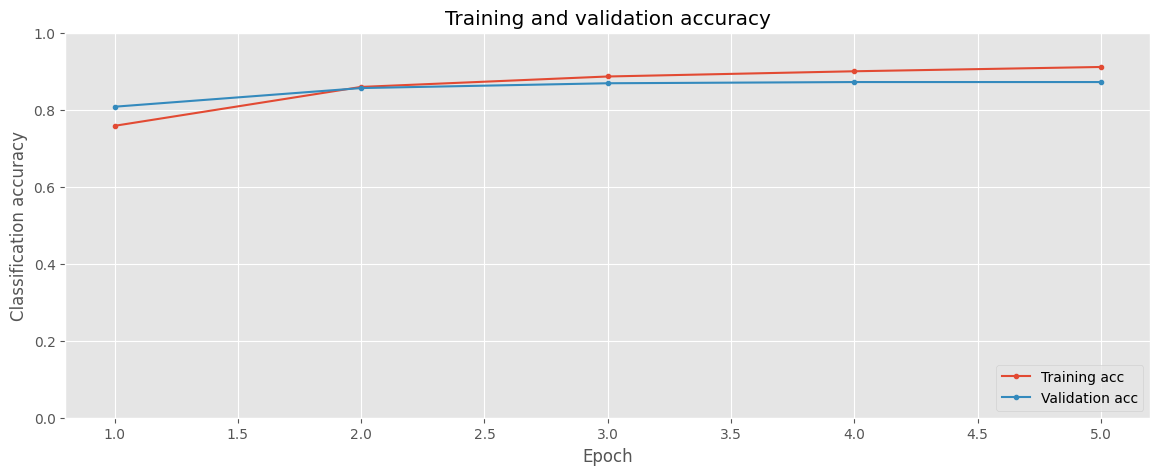

In [29]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

#### The TensorFlow embedding projector

The Tensorflow embedding projector can be found [here](https://projector.tensorflow.org/).

In [30]:
# Retrieve the embedding layer's weights from the trained model

weights = model.layers[1].get_weights()[0]

In [ ]:
# Save the word Embeddings to tsv files
# Two files: 
#     one contains the embedding labels (meta.tsv),
#     one contains the embeddings (vecs.tsv)

import io
from os import path

out_v = io.open(path.join('data', 'vecs.tsv'), 'w', encoding='utf-8')
out_m = io.open(path.join('data', 'meta.tsv'), 'w', encoding='utf-8')

k = 0

for word, token in imdb_word_idx.items():
    if k != 0:
        out_m.write('\n')
        out_v.write('\n')
    
    out_v.write('\t'.join([str(x) for x in weights[token]]))
    out_m.write(word)
    k += 1
    
out_v.close()
out_m.close()
# beware large collections of embeddings!

---
<a id="coding_tutorial_5"></a>
## Recurrent neural network layers

#### Initialize and pass an input to a SimpleRNN layer

In [36]:
# Create a SimpleRNN layer and test it

rnn_layer = tf.keras.layers.SimpleRNN(units=16)

In [37]:
# Note that only the final cell output is returned

seq = tf.constant([[[1., 1.], [ 2., 2.], [56., -100.]]])
layer_output = rnn_layer(seq)
layer_output

<tf.Tensor: shape=(1, 16), dtype=float32, numpy=
array([[-1.        ,  1.        , -0.99999225, -1.        , -1.        ,
        -1.        , -1.        , -1.        ,  1.        ,  0.9994888 ,
         1.        , -1.        , -1.        ,  0.9946025 , -1.        ,
         1.        ]], dtype=float32)>

#### Load and transform the IMDB review sentiment dataset

In [38]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [39]:
# Load the dataset


(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [40]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [42]:
# Get the word index using get_imdb_word_index()

imdb_word_idx = get_imdb_word_index()

#### Create a recurrent neural network model

In [45]:
# Get the maximum index value

max_val = max(imdb_word_idx.values())
emb_dim = 16

In [49]:
# Using Sequential, build the model:
# 1. Embedding.
# 2. LSTM.
# 3. Dense.

input = tf.keras.layers.Input((None,))
emb_lay = tf.keras.layers.Embedding(max_val+1, emb_dim, mask_zero=True)(input)
lstm_emb = tf.keras.layers.LSTM(units=16)(emb_lay)
dense_lstm = tf.keras.layers.Dense(1, activation='sigmoid')(lstm_emb)

model = tf.keras.models.Model(inputs=input, outputs=dense_lstm)

#### Compile and fit the model

In [50]:
# Compile the model with binary cross-entropy loss

model.compile(optimizer='adam', loss='binary_crossentropy', metrics='accuracy')

In [51]:
# Fit the model and save its training history

history = model.fit(x_train, y_train,
                    epochs=3, batch_size=32,
                    validation_data=)

Epoch 1/3
536/536 [==============================] - 497s 915ms/step - loss: 0.4393 - accuracy: 0.7864
Epoch 2/3
536/536 [==============================] - 399s 744ms/step - loss: 0.2286 - accuracy: 0.9145
Epoch 3/3
536/536 [==============================] - 399s 743ms/step - loss: 0.1650 - accuracy: 0.9424


#### Plot learning curves

In [52]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);

KeyError: ignored

#### Make predictions with the model

In [53]:
# View the first test data example sentence
# (invert the word index)

inv_word_idx = {value:key for key,value in imdb_word_idx.items()}
[inv_word_idx[idx] for idx in x_test[0] if idx>2]

['please',
 'give',
 'this',
 'one',
 'a',
 'miss',
 'br',
 'br',
 'and',
 'the',
 'rest',
 'of',
 'the',
 'cast',
 'rendered',
 'terrible',
 'performances',
 'the',
 'show',
 'is',
 'flat',
 'flat',
 'flat',
 'br',
 'br',
 'i',
 "don't",
 'know',
 'how',
 'michael',
 'madison',
 'could',
 'have',
 'allowed',
 'this',
 'one',
 'on',
 'his',
 'plate',
 'he',
 'almost',
 'seemed',
 'to',
 'know',
 'this',
 "wasn't",
 'going',
 'to',
 'work',
 'out',
 'and',
 'his',
 'performance',
 'was',
 'quite',
 'so',
 'all',
 'you',
 'madison',
 'fans',
 'give',
 'this',
 'a',
 'miss']

In [54]:
# Get the model prediction using model.predict()

model.predict(x_test[None, 0, :])

1/1 [==============================] - 1s 1s/step


array([[0.0240756]], dtype=float32)

In [55]:
# Get the corresponding label

y_test[0]

0

---
<a id="coding_tutorial_6"></a>
## Stacked RNNs and the Bidirectional wrapper

#### Load and transform the IMDb review sentiment dataset

In [56]:
# A function to load and preprocess the IMDB dataset

def get_and_pad_imdb_dataset(num_words=10000, maxlen=None, index_from=2):
    from tensorflow.keras.datasets import imdb

    # Load the reviews
    (x_train, y_train), (x_test, y_test) = imdb.load_data(path='imdb.npz',
                                                          num_words=num_words,
                                                          skip_top=0,
                                                          maxlen=maxlen,
                                                          start_char=1,
                                                          oov_char=2,
                                                          index_from=index_from)

    x_train = tf.keras.preprocessing.sequence.pad_sequences(x_train,
                                                        maxlen=None,
                                                        padding='pre',
                                                        truncating='pre',
                                                        value=0)
    
    x_test = tf.keras.preprocessing.sequence.pad_sequences(x_test,
                                                           maxlen=None,
                                                           padding='pre',
                                                           truncating='pre',
                                                           value=0)
    return (x_train, y_train), (x_test, y_test)

In [57]:
# Load the dataset

(x_train, y_train), (x_test, y_test) = get_and_pad_imdb_dataset(maxlen=250)

In [58]:
# A function to get the dataset word index

def get_imdb_word_index(num_words=10000, index_from=2):
    imdb_word_index = tf.keras.datasets.imdb.get_word_index(
                                        path='imdb_word_index.json')
    imdb_word_index = {key: value + index_from for
                       key, value in imdb_word_index.items() if value <= num_words-index_from}
    return imdb_word_index

In [60]:
# Get the word index using get_imdb_word_index()

word_idx = get_imdb_word_index()

#### Build stacked and bidirectional recurrent models

In [64]:
# Get the maximum index value and specify an embedding dimension

max_val = max(word_idx.values())
emb_dim = 16

In [72]:
# Using Sequential, build a stacked LSTM model via return_sequences=True

model = tf.keras.models.Sequential([
    Embedding(max_val+1, emb_dim, mask_zero=True),
    LSTM(32, return_sequences=True),
    LSTM(32),
    Dense(1, activation='sigmoid')
])

In [73]:
# Using Sequential, build a bidirectional RNN with merge_mode='sum'

model = tf.keras.models.Sequential([
    Embedding(max_val+1, emb_dim, mask_zero=True),
    Bidirectional(layer=tf.keras.layers.LSTM(8),
                                  backward_layer=tf.keras.layers.GRU(8, go_backwards=True),
                                  merge_mode='sum'),
    Dense(1, activation='sigmoid')
])

In [74]:
# Create a model featuring both stacked recurrent layers and a bidirectional layer

model = tf.keras.Sequential([
    Embedding(max_val+1, emb_dim),
    Bidirectional(LSTM(8, return_sequences=True),
                  merge_mode='concat'),
    GRU(8),
    Dense(1, activation='relu')                  
])

#### Compile and fit the model

In [76]:
# Compile the model

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [77]:
# Train the model, saving its history

history = model.fit(x_train, y_train,
                    epochs=3, batch_size=32,
                    validation_data=(x_test, y_test))

Epoch 1/3
536/536 [==============================] - 69s 116ms/step - loss: 0.5946 - accuracy: 0.7202 - val_loss: 0.4681 - val_accuracy: 0.8118
Epoch 2/3
536/536 [==============================] - 33s 62ms/step - loss: 0.3368 - accuracy: 0.8860 - val_loss: 0.3985 - val_accuracy: 0.8515
Epoch 3/3
536/536 [==============================] - 24s 44ms/step - loss: 0.8724 - accuracy: 0.5681 - val_loss: 0.6202 - val_accuracy: 0.6437


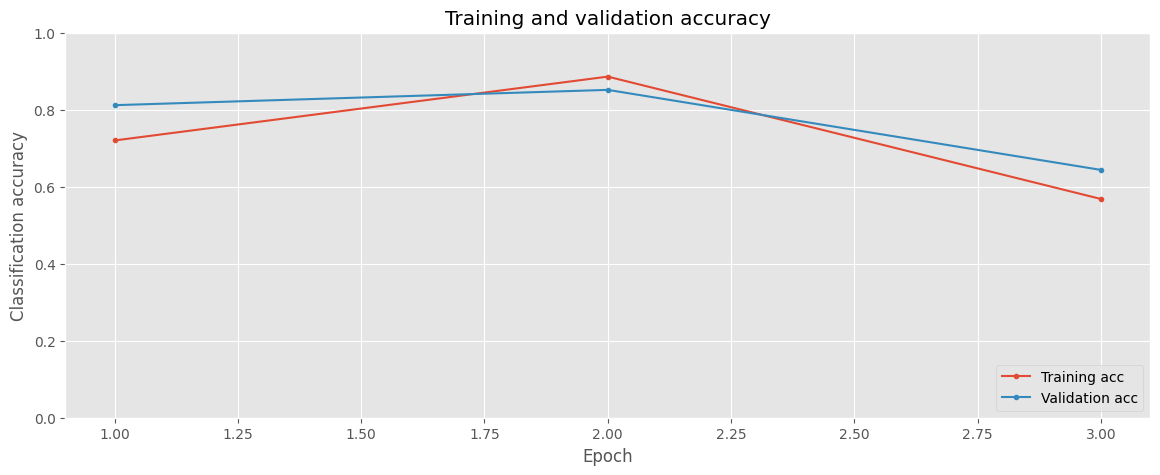

In [78]:
# Plot the training and validation accuracy

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

history_dict = history.history

acc      = history_dict['accuracy']
val_acc  = history_dict['val_accuracy']
loss     = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.figure(figsize=(14,5))
plt.plot(epochs, acc, marker='.', label='Training acc')
plt.plot(epochs, val_acc, marker='.', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Classification accuracy')
plt.legend(loc='lower right')
plt.ylim(0, 1);